## Price Prediction
The jupyter notebook file is to answer how to predict listing price by building a linear regression model.

### Read Data

In [1]:
import pandas as pd
import numpy as np

data_listing=pd.read_csv('listings.csv')
data_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


We extracted related columns in the listing_var from the raw dataset and indicated numerical variables and categorical variables in the numerical_var and categorical_var.

In [2]:
listing_var=['host_response_time','host_response_rate','host_is_superhost','host_listings_count','zipcode','property_type',
            'room_type','accommodates','bathrooms','bedrooms','price','security_deposit','cleaning_fee','minimum_nights','availability_30',
            'availability_90','availability_60','availability_365','number_of_reviews','review_scores_rating','instant_bookable',
            'cancellation_policy','reviews_per_month']
numerical_var=['host_response_rate','host_listings_count','accommodates','bathrooms','bedrooms','price','security_deposit',
               'cleaning_fee','minimum_nights','availability_30','availability_90','availability_60','availability_365','number_of_reviews',
               'review_scores_rating','reviews_per_month']
categorical_var=['host_response_time','host_is_superhost','zipcode','property_type','room_type','instant_bookable','cancellation_policy']
print ('The number of columns extracted to predict price is',len(listing_var))
print ('The number of numerical columns is',len(numerical_var))
print ('The numver of categorical columns is',len(categorical_var))

The number of columns extracted to predict price is 23
The number of numerical columns is 16
The numver of categorical columns is 7


In [3]:
listingdata=data_listing[listing_var]
listingdata.head()

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,...,minimum_nights,availability_30,availability_90,availability_60,availability_365,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month
0,within a few hours,96%,f,3.0,98119,Apartment,Entire home/apt,4,1.0,1.0,...,1,14,71,41,346,207,95.0,f,moderate,4.07
1,within an hour,98%,t,6.0,98119,Apartment,Entire home/apt,4,1.0,1.0,...,2,13,16,13,291,43,96.0,f,strict,1.48
2,within a few hours,67%,f,2.0,98119,House,Entire home/apt,11,4.5,5.0,...,4,1,17,6,220,20,97.0,f,strict,1.15
3,NaN,NaN,f,1.0,98119,Apartment,Entire home/apt,3,1.0,0.0,...,1,0,0,0,143,0,NaN,f,flexible,NaN
4,within an hour,100%,f,2.0,98119,House,Entire home/apt,6,2.0,3.0,...,1,30,90,60,365,38,92.0,f,strict,0.89


### Data Preparation

 We found that 'price','cleaning_fee' and 'host_response_rate' are 'object' dtype other than numerical dtype.It is because they have characters like '$' or ',',etc. We need to remove these characters and transform these columns to numerical dtype.

In [4]:
listingdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 23 columns):
host_response_time      3295 non-null object
host_response_rate      3295 non-null object
host_is_superhost       3816 non-null object
host_listings_count     3816 non-null float64
zipcode                 3811 non-null object
property_type           3817 non-null object
room_type               3818 non-null object
accommodates            3818 non-null int64
bathrooms               3802 non-null float64
bedrooms                3812 non-null float64
price                   3818 non-null object
security_deposit        1866 non-null object
cleaning_fee            2788 non-null object
minimum_nights          3818 non-null int64
availability_30         3818 non-null int64
availability_90         3818 non-null int64
availability_60         3818 non-null int64
availability_365        3818 non-null int64
number_of_reviews       3818 non-null int64
review_scores_rating    3171 non-null floa

In [5]:

def removechar(string):
    '''
    INPUT:
    string - original string with characters will be removed 
    OUTPUT:
    num - the numerical dtype after removed the characters like '$','%' and ','
    
    Remove characters like  '$','%' and ',' in the original columns and transform 'object' type to 'int' type.
    '''
    num=None
    if str(string).find('$')>=0 :
        string1=str(string)[str(string).find('$')+1:str(string).find('.')]
        if string1.find(',')<0:
            num=int(string1)
        elif string1.find(',')>0:
            #print (string1)
            num=int(string1[0])*1000+int(string1[string.find(',')+1:])
            #print (num)
        return num
    
    elif str(string).find('%')>0:
        string1=str(string)[:str(string).find('%')]
        num=float(string1)/100    
    return num


In [6]:
cf_col=listingdata['cleaning_fee'].map(removechar)
pr_col=listingdata['price'].map(removechar)
hrr_col=listingdata['host_response_rate'].map(removechar)

In [7]:
#insert the charaters removed numerical columns in the dataset
listingdata.insert(loc=listingdata.shape[1],column='cleaning_fee_corr',value=cf_col)
listingdata.insert(loc=listingdata.shape[1],column='price_corr',value=pr_col)
listingdata.insert(loc=listingdata.shape[1],column='host_response_rate_corr',value=hrr_col)

Check the columns after removed characters,and remove the original columns of 'cleaning_fee','price','host_response_rate'.

In [8]:
listingdata[['cleaning_fee','price','host_response_rate','cleaning_fee_corr','price_corr','host_response_rate_corr',]].head()

,cleaning_fee,price,host_response_rate,cleaning_fee_corr,price_corr,host_response_rate_corr
0,NaN,$85.00,96%,NaN,85,0.96
1,$40.00,$150.00,98%,40.0,150,0.98
2,$300.00,$975.00,67%,300.0,975,0.67
3,NaN,$100.00,NaN,NaN,100,NaN
4,$125.00,$450.00,100%,125.0,450,1.00


In [9]:
#drop the original columns of 'cleaning_fee','price','host_response_rate'
listingdata=listingdata.drop(['cleaning_fee','price','host_response_rate'],axis=1)

In [10]:
print (listingdata.shape)

(3818, 23)


### Handle the missing values

In [11]:
#check the missing values
def missingcheck(df):
    missingpercentage=(df.shape[0]-df.count())/df.shape[0]
    return missingpercentage
print ('Check the missing values in each column \n',missingcheck(listingdata).sort_values(ascending=False))

Check the missing values in each column 
 security_deposit           0.511262
cleaning_fee_corr          0.269775
review_scores_rating       0.169460
reviews_per_month          0.164222
host_response_rate_corr    0.136983
host_response_time         0.136983
bathrooms                  0.004191
zipcode                    0.001833
bedrooms                   0.001572
host_is_superhost          0.000524
host_listings_count        0.000524
property_type              0.000262
room_type                  0.000000
accommodates               0.000000
instant_bookable           0.000000
number_of_reviews          0.000000
cancellation_policy        0.000000
minimum_nights             0.000000
price_corr                 0.000000
availability_90            0.000000
availability_60            0.000000
availability_365           0.000000
availability_30            0.000000
dtype: float64


The missing percentage of 'Security_deposit' is >50%, so we remove the column. We have 2 choices to deal with NAs.We can drop rows having any NAs and we can also fill NAs with the columns mean. I have tried both methods and found that filling NAs with mean having better r2score in LinearRegression model. So in the next step ,we fill NAs with column mean. 

In [12]:
listingdata=listingdata.drop('security_deposit',axis=1)
#listingdata=listingdata.dropna(how='any',axis=0)
print ('The listingdata after dropping security_deposit rows has {} rows,and {} columns'.format(listingdata.shape[0],listingdata.shape[1]))

The listingdata after dropping security_deposit rows has 3818 rows,and 22 columns


In [13]:
numerical_var1=['host_response_rate_corr','price_corr','cleaning_fee_corr',
                'host_listings_count','accommodates','bathrooms','bedrooms',
               'minimum_nights','availability_30','availability_90','availability_60','availability_365','number_of_reviews',
               'review_scores_rating','reviews_per_month']

In [14]:
#fill NAs with column mean
missingfill=lambda col:col.fillna(col.mean())
listingdata[numerical_var1]=listingdata[numerical_var1].apply(missingfill,axis=0)
listingdata[numerical_var1].head()

,host_response_rate_corr,price_corr,cleaning_fee_corr,host_listings_count,accommodates,bathrooms,bedrooms,minimum_nights,availability_30,availability_90,availability_60,availability_365,number_of_reviews,review_scores_rating,reviews_per_month
0,0.960000,85,61.710904,3.0,4,1.0,1.0,1,14,71,41,346,207,95.000000,4.070000
1,0.980000,150,40.000000,6.0,4,1.0,1.0,2,13,16,13,291,43,96.000000,1.480000
2,0.670000,975,300.000000,2.0,11,4.5,5.0,4,1,17,6,220,20,97.000000,1.150000
3,0.948868,100,61.710904,1.0,3,1.0,0.0,1,0,0,0,143,0,94.539262,2.078919
4,1.000000,450,125.000000,2.0,6,2.0,3.0,1,30,90,60,365,38,92.000000,0.890000


### Data Exploration

We see in the coorelation matrix of numerical columns,there are some columns are highly correlated:
'availability_30'and 'availability_90''has coefficient correlation=0.88.
'availability_30'and'availability_60' has coefficient correlation=0.94.
'accommodates' and 'bedrooms' has coefficient correlation =0.77.

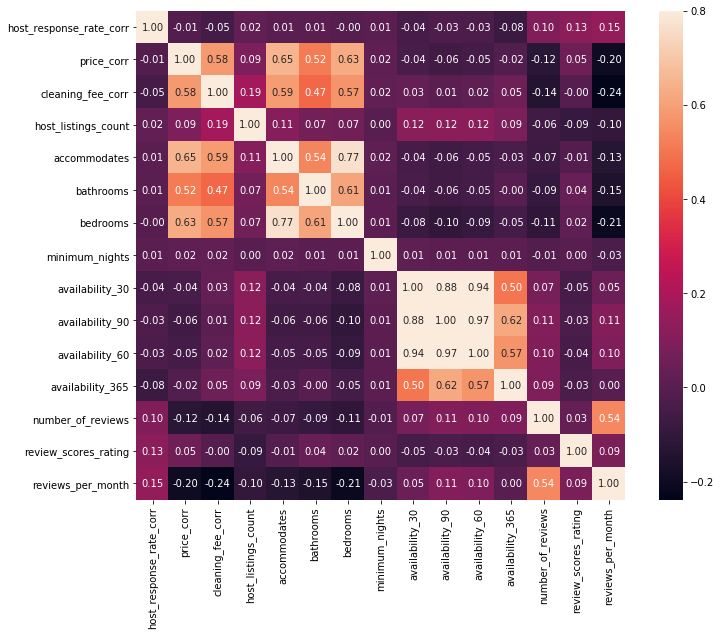

In [15]:
#cooralation matrix

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

corrmat = listingdata[numerical_var1].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True,fmt='.2f')


We do onehot encoding by get_dummies() with categorical columns.

In [16]:
cat_vars = listingdata.select_dtypes(include=['object']).copy().columns
for var in  cat_vars:
        # for each cat add dummy var, drop original column
    listingdata = pd.concat([listingdata.drop(var, axis=1), pd.get_dummies(listingdata[var], prefix=var,dummy_na=True, prefix_sep='_', drop_first=True)], axis=1)
    

In [17]:
#The dataset shape after get_dummies
print (listingdata.shape)

(3818, 73)


### Train the Model

In [18]:
y=listingdata['price_corr']
#X=listingdata.drop(['availability_90','availability_60','bedrooms','price_corr'],axis=1)
X=listingdata.drop('price_corr',axis=1)

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

We have tried linearregression model and randomforrestregression model. LinearRegressor have better r2score on testset(0.59) and train set(0.61). We got r2score =0.57 on testset by RandomForrestRegression model. 

In [20]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression(normalize=True)
lm.fit(X_train,y_train)
y_pred_train=lm.predict(X_train)
y_pred_test=lm.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
r2score_train=r2_score(y_train,y_pred_train)
r2score_test=r2_score(y_test,y_pred_test)
mse_train=mean_squared_error(y_train,y_pred_train)
mse_test=mean_squared_error(y_test,y_pred_test)
print ('r square score on test set is {},on train set is {}'.format(r2score_test,r2score_train))
print ('mean squared error score on test set is {}, on train set is {}'.format(mse_test,mse_train))

r square score on test set is 0.5933427861901288,on train set is 0.612025430350621
mean squared error score on test set is 3397.103174113216, on train set is 3131.7904053570514


In [21]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=24)
rf.fit(X_train,y_train)
y_pred_train=rf.predict(X_train)
y_pred_test=rf.predict(X_test)

r2score_train=r2_score(y_train,y_pred_train)
r2score_test=r2_score(y_test,y_pred_test)
mse_train=mean_squared_error(y_train,y_pred_train)
mse_test=mean_squared_error(y_test,y_pred_test)
print ('r square score on test set is {},on train set is {}'.format(r2score_test,r2score_train))
print ('mean square error score on test set is {},on train set is {}'.format(mse_test,mse_train))

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


r square score on test set is 0.5727187152223754,on train set is 0.9165102105839693
mean square error score on test set is 3569.3910238510757,on train set is 673.9424227590582


### Combat Overfitting

We have used the whole bunch of features to train and predict. That may have issue of overfitting. In this step, we'll try to subset features to overcome overfittings and find the optimal subset of features having highest r2score on testset. We consider that columns that weight more are also more useful for predicting our response variable. So we use cutoff to subset X columns each time with larger weight columns  to train and test. Then see at which cutoff point we achieve the highest r2score on testset that means we get the best subset of features to overcome overfitting.

In [22]:
#Sort the columns by the sum of columns, the larger the sum is , the more the column weight is 
X.sum().sort_values(ascending=False)

availability_365                         934542.000000
review_scores_rating                     360950.902554
cleaning_fee_corr                        235612.230990
availability_90                          221759.000000
availability_60                          140559.000000
number_of_reviews                         84849.000000
availability_30                           64090.000000
host_listings_count                       27328.315514
accommodates                              12788.000000
minimum_nights                             9046.000000
reviews_per_month                          7937.312109
bedrooms                                   4992.846275
bathrooms                                  4808.651499
host_response_rate_corr                    3622.777954
property_type_House                        1733.000000
host_response_time_within an hour          1692.000000
cancellation_policy_strict                 1417.000000
cancellation_policy_moderate               1251.000000
room_type_

In [23]:
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result
    
    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:
        
        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
       # print (X.sum())
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True) 
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)
        
        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)
    
    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()
        
    best_cutoff = max(results, key=results.get)
    
    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    #X_reduce_col=reduce_X.columns
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True) 
    lm_model.fit(X_train, y_train)
        
    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

We see on the plot, We got the highest r2score=0.605 on testset and r2score=0.610 on trainset. The X_train and X_test of the output of the function 'find_optimal_lm_mod()' is from the cutoff point we  got the highest r2score on testset, and at the cutoff point we got 69 features subset .

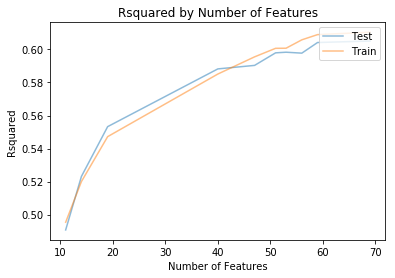

In [24]:
cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 20, 10, 5,0]
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test= find_optimal_lm_mod(X, y, cutoffs)

In [25]:
print ('The max r2score on testset of optimal LinearRegression model is {}'.format(r2_scores_test[np.argmax(r2_scores_test)]))
print ('The max r2score on trainset if optimal LinearRegression model is {}'.format(r2_scores_train[np.argmax(r2_scores_test)]))
print ('The number of features when achieve highest r2score on testset is {}'.format(X_train.shape[1]))

The max r2score on testset of optimal LinearRegression model is 0.6050834234767488
The max r2score on trainset if optimal LinearRegression model is 0.6104090867781367
The number of features when achieve highest r2score on testset is 69


We examined the top 20 high coefficienct weight of linearregression mode. We found that property_type (such as boat and shared room) and location(zipcode) have large coefficient weight on predicting price. We see boat room has highly positive coefficient on price while shared room has highly negative coefficient on price.

In [26]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = coefficients
    coefs_df['abs_coefs'] = np.abs(coefficients)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function

coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
#print (len(coef_df))
coef_df.head(20)


,est_int,coefs,abs_coefs
49,property_type_Boat,130.865949,130.865949
43,zipcode_98177,-82.501951,82.501951
44,zipcode_98178,-74.375696,74.375696
38,zipcode_98133,-70.749533,70.749533
42,zipcode_98146,-63.947915,63.947915
24,zipcode_98106,-63.909384,63.909384
36,zipcode_98125,-63.723052,63.723052
65,room_type_Shared room,-61.924119,61.924119
41,zipcode_98144,-56.317640,56.317640
46,zipcode_99\n98122,-54.420329,54.420329


We see the highest positive coefficients are: property_type_Boat, property_type_Camper/RV are very expensive room types, zipcode_98134 is expensive area. Other factors like bathroom and bedrooms are also related positively with price.

In [27]:
coef_df[coef_df.coefs>0]

,est_int,coefs,abs_coefs
49,property_type_Boat,130.865949,130.865949
39,zipcode_98134,48.876181,48.876181
52,property_type_Camper/RV,48.271702,48.271702
17,host_response_time_nan,24.081227,24.081227
3,bedrooms,23.901988,23.901988
57,property_type_Loft,23.703266,23.703266
2,bathrooms,22.711608,22.711608
62,property_type_Yurt,21.947396,21.947396
53,property_type_Chalet,19.722741,19.722741
48,property_type_Bed & Breakfast,18.457518,18.457518


### Fine Tuning on RandomForrestRegression Model

We used GridSearchCV to find the optimal parameters , the tuned parameters RandomForrestRegressor doesnot improved much ,only have slight improvement of r2score=0.61 on testset,r2=0.82 on trainset

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
param_grid={'n_estimators':[24,25,26,30],'min_samples_leaf':[1,2,3,4]
            }
from sklearn.metrics import make_scorer
scorer = make_scorer(r2_score)
rf=RandomForestRegressor(param_grid,random_state=24)
rf_model = GridSearchCV(rf, param_grid, n_jobs=-1,cv=5,scoring=scorer)
rf_model.fit(X_train,y_train)
y_pred_train=rf_model.predict(X_train)
y_pred_test=rf_model.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
r2score_train=r2_score(y_train,y_pred_train)
r2score_test=r2_score(y_test,y_pred_test)
mse_train=mean_squared_error(y_train,y_pred_train)
mse_test=mean_squared_error(y_test,y_pred_test)
print ('r square score on test set is {},on train set is {}'.format(r2score_test,r2score_train))
print ('mean squared error score on test set is {},on train set is {}'.format(mse_test,mse_train))
print ('the best estimator is {}'.format(rf_model.best_estimator_))

r square score on test set is 0.6118529086768387,on train set is 0.8214647967128096
mean squared error score on test set is 3323.9166693027214,on train set is 1421.320549403084
the best estimator is RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
           oob_score=False, random_state=24, verbose=0, warm_start=False)


I also examined the features importances of randomforrestregressor. The order of feature ranking as follow. Does the features importances consistent with coefficients in LinearRegression model? 

In [29]:
importances=rf_model.best_estimator_.feature_importances_
indices=np.argsort(importances)[::-1]
features_list=X_train.columns

print ('Feature Ranking:\n')
for i in range(X_train.shape[1]):
    print ('feature no. %d: %s %f' % (i+1,features_list[indices[i]],importances[indices[i]]))

Feature Ranking:

feature no. 1: bedrooms 0.423887
feature no. 2: cleaning_fee_corr 0.090743
feature no. 3: bathrooms 0.080306
feature no. 4: accommodates 0.064085
feature no. 5: reviews_per_month 0.049265
feature no. 6: availability_365 0.038974
feature no. 7: room_type_Private room 0.034812
feature no. 8: number_of_reviews 0.030275
feature no. 9: room_type_Shared room 0.020774
feature no. 10: review_scores_rating 0.016955
feature no. 11: host_listings_count 0.016923
feature no. 12: availability_90 0.013794
feature no. 13: host_response_time_nan 0.012152
feature no. 14: availability_30 0.010795
feature no. 15: availability_60 0.008958
feature no. 16: minimum_nights 0.008936
feature no. 17: property_type_House 0.007127
feature no. 18: zipcode_98119 0.006456
feature no. 19: host_response_rate_corr 0.006298
feature no. 20: host_response_time_within a few hours 0.006011
feature no. 21: zipcode_98104 0.005888
feature no. 22: cancellation_policy_strict 0.004392
feature no. 23: cancellation_

We see that the rank of features importances are not consistent with coefficient weights neither on coefs nor absolute value of coefs. It's because features importances calculated base on entropy gain of each split in tree model. While coefficients is the weight of each columns in Linear Regression model. Thay are total 2 different things, not comparable.  

### More Experiment on Remove Coefficienct Correlation

Should I remove high coefficient correlation features? Let's do more test on removing 'availability_90','availability_60','bedrooms', since they are highly related with 'availability_30' and 'accommodates'. And see, we got a worse r2score on both testset and trainset. We also got a worse r2score on RandomForrestRegression. 

In [30]:
y=listingdata['price_corr']
X=listingdata.drop(['availability_90','availability_60','bedrooms','price_corr'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
lm=LinearRegression(normalize=True)
lm.fit(X_train,y_train)
y_pred_train=lm.predict(X_train)
y_pred_test=lm.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
r2score_train=r2_score(y_train,y_pred_train)
r2score_test=r2_score(y_test,y_pred_test)
mse_train=mean_squared_error(y_train,y_pred_train)
mse_test=mean_squared_error(y_test,y_pred_test)
print ('r square score on test set is {},on train set is {}'.format(r2score_test,r2score_train))
print ('mean squared error score on test set is {}, on train set is {}'.format(mse_test,mse_train))

r square score on test set is 0.56684093118346,on train set is 0.5952648290002255
mean squared error score on test set is 3618.4924245818806, on train set is 3267.084557611979


In [31]:
rf=RandomForestRegressor(random_state=24)
rf.fit(X_train,y_train)
y_pred_train=rf.predict(X_train)
y_pred_test=rf.predict(X_test)

r2score_train=r2_score(y_train,y_pred_train)
r2score_test=r2_score(y_test,y_pred_test)
mse_train=mean_squared_error(y_train,y_pred_train)
mse_test=mean_squared_error(y_test,y_pred_test)
print ('r square score on test set is {},on train set is {}'.format(r2score_test,r2score_train))
print ('mean square error score on test set is {},on train set is {}'.format(mse_test,mse_train))

r square score on test set is 0.5440017268985746,on train set is 0.9126660502961377
mean square error score on test set is 3809.284892379291,on train set is 704.9730759200781


#### Experiment Conclusion: high coefficient correlation features should not be removed when builting Regression models.